In [1]:
import pandas as pd
import numpy as np

In [2]:
import praw
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
reddit = praw.Reddit(client_id='KVLjJA-Np9lkU5O6MSOjyQ',
                     client_secret='1ezX-YhzYbrgecC3ZqA1OlE7Vj_hfw',
                     user_agent='MSDS640WEEK6')

In [4]:
hr_sub = reddit.subreddit('humanrights')

In [5]:
posts = hr_sub.hot(limit=100)

In [6]:
text = " ".join([post.title for post in posts])

In [7]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

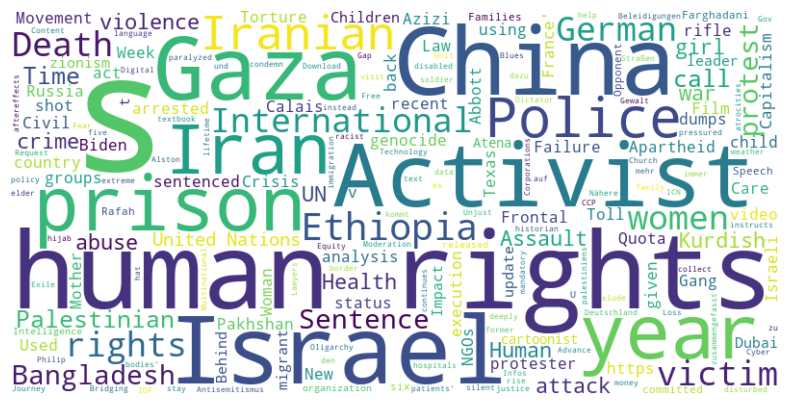

In [8]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}


hr_sub = reddit.subreddit('humanrights').hot(limit=None)

for post in list(hr_sub):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [10]:
hr_df = pd.DataFrame(reddit_data)

In [11]:
hr_df

,title,link,author,n_comments,score,text
0,Free Download - International Human Rights tex...,/r/humanrights/comments/1ewjc6f/free_download_...,wilybabushka,0,6,
1,Failure to help disabled victim of violence wi...,/r/humanrights/comments/1ev55g6/failure_to_hel...,taktiktot,0,1,
2,Oligarchy,/r/humanrights/comments/1eucpc8/oligarchy/,globeworldmap,0,1,
3,Woman shot by Iran police over mandatory hijab...,/r/humanrights/comments/1esl7dj/woman_shot_by_...,dect60,0,17,
4,Bridging the Gap: How Technology Can Advance H...,/r/humanrights/comments/1et0gzt/bridging_the_g...,CatSewage,0,1,
...,...,...,...,...,...,...
802,The forced eviction of Bedouin tribes in Egypt...,/r/humanrights/comments/11an7wf/the_forced_evi...,dailyculture,0,8,
803,'Govt's Lack of Clear Political Agenda Exacerb...,/r/humanrights/comments/119zqmp/govts_lack_of_...,opeort,0,8,
804,Maria Ponomarenko: Immensely courageous Russia...,/r/humanrights/comments/119s3ns/maria_ponomare...,thermopylae_53,1,12,
805,Turkey fines broadcasters for coverage critica...,/r/humanrights/comments/119wdxj/turkey_fines_b...,dailyculture,0,2,


In [12]:
import sqlite3

con = sqlite3.connect("hr_reddit.sqlite")
hr_df.to_sql('posts', con, if_exists='replace', index=False)

807

In [14]:
hr_df.head()

,title,link,author,n_comments,score,text
0,Free Download - International Human Rights tex...,/r/humanrights/comments/1ewjc6f/free_download_...,wilybabushka,0,6,
1,Failure to help disabled victim of violence wi...,/r/humanrights/comments/1ev55g6/failure_to_hel...,taktiktot,0,1,
2,Oligarchy,/r/humanrights/comments/1eucpc8/oligarchy/,globeworldmap,0,1,
3,Woman shot by Iran police over mandatory hijab...,/r/humanrights/comments/1esl7dj/woman_shot_by_...,dect60,0,17,
4,Bridging the Gap: How Technology Can Advance H...,/r/humanrights/comments/1et0gzt/bridging_the_g...,CatSewage,0,1,


<Axes: ylabel='Frequency'>

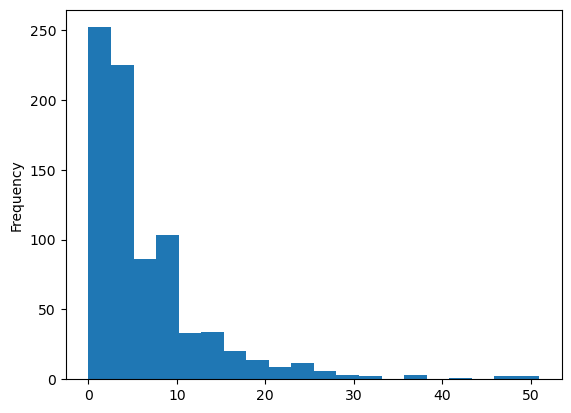

In [15]:
hr_df['score'].plot.hist(bins=20)

In [16]:
hr_df[hr_df['score'] > 32]

,title,link,author,n_comments,score,text
28,Police shot student in Bangladesh Protest 2024,/r/humanrights/comments/1ealzy8/police_shot_st...,Immediate_End_9489,0,47,Video footage collected today after 5 days of ...
356,“We once thought there were good guys in the w...,/r/humanrights/comments/18mmp3f/we_once_though...,workersright,23,41,
383,Palestinian children killed by Israeli air str...,/r/humanrights/comments/17r946z/palestinian_ch...,roquentinA,4,36,
671,“They threw us into a pit with dead pigs and p...,/r/humanrights/comments/13u0auq/they_threw_us_...,kingkongsingsong1,1,36,
682,“They separated us in a filtration camp. Russi...,/r/humanrights/comments/13ggx31/they_separated...,kingkongsingsong1,1,33,
721,[Academic Paper] Circumcision of male infants ...,/r/humanrights/comments/12uh5zf/academic_paper...,Oncefa2,6,51,
750,Israeli soldiers raiding mosque,/r/humanrights/comments/12c0q64/israeli_soldie...,Potato_s_potato,5,51,Israeli soldiers raids al aqsa mosque and viol...
760,"Uyghurs tell Congress of gang rape, shackles a...",/r/humanrights/comments/1226uch/uyghurs_tell_c...,Strongbow85,1,46,
770,"Child Detainees in Iran Subjected To Flogging,...",/r/humanrights/comments/11tdgef/child_detainee...,dect60,1,37,


<Axes: xlabel='score', ylabel='n_comments'>

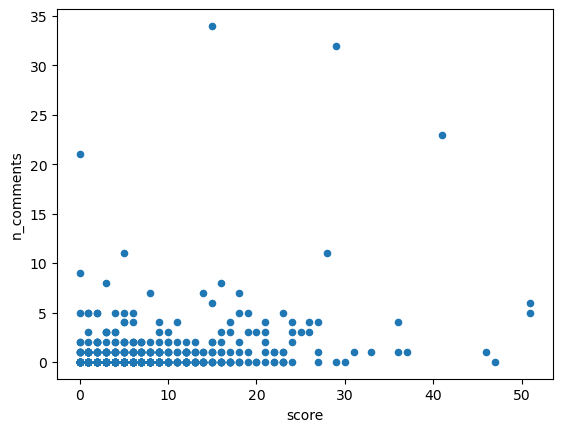

In [17]:
hr_df.plot.scatter(x='score', y='n_comments')

In [18]:
import nltk

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops[:100]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once']

In [21]:
words = ' '.join(hr_df['title']).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]

In [22]:
cleaned_fd = nltk.FreqDist(cleaned_words)
cleaned_fd.most_common(30)

[('rights', 98),
 ('human', 86),
 ('china', 73),
 ('-', 71),
 ('gaza', 50),
 ('israel', 40),
 ('|', 39),
 ('war', 38),
 ('uyghur', 38),
 ('un', 36),
 ('us', 33),
 ('tibetan', 27),
 ('police', 26),
 ('hong', 25),
 ('international', 24),
 ('israeli', 23),
 ('chinese', 22),
 ('new', 22),
 ('children', 22),
 ('palestinian', 20),
 ('says', 20),
 ('people', 20),
 ('report', 19),
 ('kong', 18),
 ('prison', 17),
 ('women', 17),
 ('crimes', 17),
 ('forced', 17),
 ('years', 16),
 ('protests', 15)]

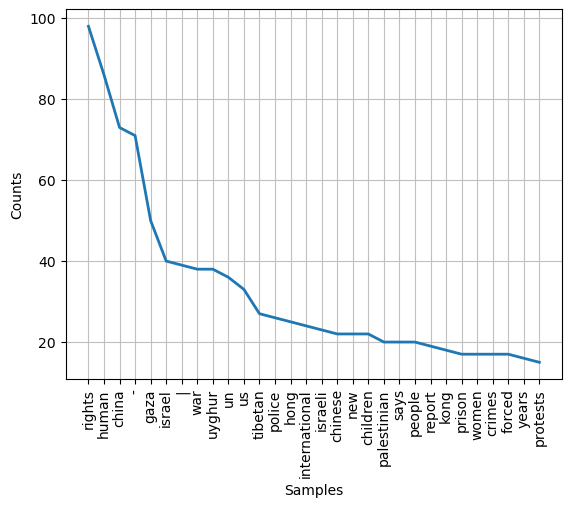

<Axes: xlabel='Samples', ylabel='Counts'>

In [23]:
cleaned_fd.plot(30)

In [24]:
stops = set(stops) | set(['|', 'un', 'us', 'says', 'new', '-', 'people', 'years'])

In [25]:
cleaned_words_2 = [w for w in cleaned_words if w not in set(stops)]

In [26]:
cleaned_fd_2 = nltk.FreqDist(cleaned_words_2)
cleaned_fd_2.most_common(20)

[('rights', 98),
 ('human', 86),
 ('china', 73),
 ('gaza', 50),
 ('israel', 40),
 ('war', 38),
 ('uyghur', 38),
 ('tibetan', 27),
 ('police', 26),
 ('hong', 25),
 ('international', 24),
 ('israeli', 23),
 ('chinese', 22),
 ('children', 22),
 ('palestinian', 20),
 ('report', 19),
 ('kong', 18),
 ('prison', 17),
 ('women', 17),
 ('crimes', 17)]

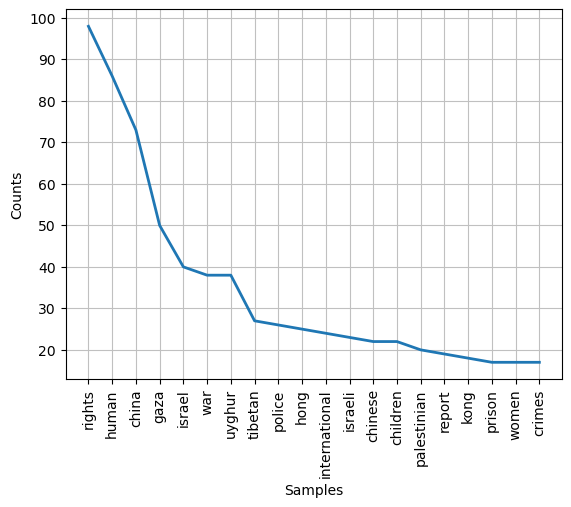

<Axes: xlabel='Samples', ylabel='Counts'>

In [27]:
cleaned_fd_2.plot(20)

In [28]:
con = sqlite3.connect("hr_reddit.sqlite")
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
df

,title,link,author,n_comments,score,text
0,Free Download - International Human Rights tex...,/r/humanrights/comments/1ewjc6f/free_download_...,wilybabushka,0,6,
1,Failure to help disabled victim of violence wi...,/r/humanrights/comments/1ev55g6/failure_to_hel...,taktiktot,0,1,
2,Oligarchy,/r/humanrights/comments/1eucpc8/oligarchy/,globeworldmap,0,1,
3,Woman shot by Iran police over mandatory hijab...,/r/humanrights/comments/1esl7dj/woman_shot_by_...,dect60,0,17,
4,Bridging the Gap: How Technology Can Advance H...,/r/humanrights/comments/1et0gzt/bridging_the_g...,CatSewage,0,1,
...,...,...,...,...,...,...
802,The forced eviction of Bedouin tribes in Egypt...,/r/humanrights/comments/11an7wf/the_forced_evi...,dailyculture,0,8,
803,'Govt's Lack of Clear Political Agenda Exacerb...,/r/humanrights/comments/119zqmp/govts_lack_of_...,opeort,0,8,
804,Maria Ponomarenko: Immensely courageous Russia...,/r/humanrights/comments/119s3ns/maria_ponomare...,thermopylae_53,1,12,
805,Turkey fines broadcasters for coverage critica...,/r/humanrights/comments/119wdxj/turkey_fines_b...,dailyculture,0,2,


In [29]:
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')

In [30]:
sentiment_df

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


In [31]:
sentiment_dict = sentiment_df.to_dict()['score']

In [32]:
import numpy as np

title_sentiments = []
for title in df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments))

In [33]:
df['keyword_sentiment'] = title_sentiments

<Axes: ylabel='Frequency'>

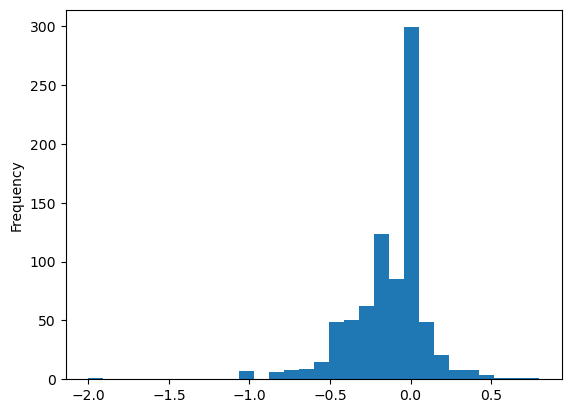

In [34]:
df['keyword_sentiment'].plot.hist(bins=30)

In [35]:
df.describe()

,n_comments,score,keyword_sentiment
count,807.000000,807.000000,807.000000
mean,0.667906,6.465923,-0.130051
std,2.321813,6.891647,0.240372
min,0.000000,0.000000,-2.000000
25%,0.000000,2.000000,-0.237647
50%,0.000000,4.000000,-0.071429
75%,1.000000,8.000000,0.000000
max,34.000000,51.000000,0.800000


In [36]:
df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']]

,title,keyword_sentiment
114,boycott,-2.000000
67,Hate crime legislation can’t—and won’t—save us,-1.000000
718,Dying patients protest looming telehealth crac...,-1.000000
478,mentally destroying youtuber,-1.000000
776,The anti-lgbt hate crime in serbia,-1.000000
...,...,...
249,letter of love to Palestinian allies,0.500000
642,"FREE ""Reproductive Freedom For All"" sticker!",0.500000
611,Uyghur rights advocates win grants from Elie W...,0.555556
110,calling for solidarity,0.666667


In [37]:
df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']][:10]

,title,keyword_sentiment
114,boycott,-2.000000
67,Hate crime legislation can’t—and won’t—save us,-1.000000
718,Dying patients protest looming telehealth crac...,-1.000000
478,mentally destroying youtuber,-1.000000
776,The anti-lgbt hate crime in serbia,-1.000000
107,ICC ISRAEL WARNING,-1.000000
157,‘Israel Kills Journalists to Hide its Horrendo...,-1.000000
657,Detained Gaddafi Health Deteriorates During Hu...,-1.000000
149,US politicians threaten to invade Int'l Crimin...,-0.857143
415,Unlawful Gaza Blockade Deadly for Children,-0.833333


In [38]:
df.sort_values(by='keyword_sentiment')['title'].to_list()[:10]

['boycott',
 'Hate crime legislation can’t—and won’t—save us',
 'Dying patients protest looming telehealth crackdown',
 'mentally destroying youtuber',
 'The anti-lgbt hate crime in serbia',
 'ICC ISRAEL WARNING',
 '‘Israel Kills Journalists to Hide its Horrendous War Crimes’',
 'Detained Gaddafi Health Deteriorates During Hunger Strike',
 "US politicians threaten to invade Int'l Criminal Court if Israel faces war crimes charges",
 'Unlawful Gaza Blockade Deadly for Children']

In [39]:
df.sort_values(by='keyword_sentiment', ascending=False)[['title', 'keyword_sentiment']][:10]

,title,keyword_sentiment
154,You Don't Get Freedom Peacefully,0.800000
110,calling for solidarity,0.666667
611,Uyghur rights advocates win grants from Elie W...,0.555556
642,"FREE ""Reproductive Freedom For All"" sticker!",0.500000
249,letter of love to Palestinian allies,0.500000
731,China’s grand designs in resource rich Central...,0.454545
213,What if you could naturally feel euphoric on-d...,0.444444
135,Top U.S. & World Headlines,0.400000
207,Know your rights! Learn Best Human Rights Courses,0.375000
719,UAE and Sudan Agree to Strengthen Bilateral Re...,0.375000


In summary, I completed the following:

Started with a keyword sentiment analysis.
Loaded a dictionary of words and sentiment values.
Calculated the average sentiment for each title of each post, and get the scores for each word and take the average for each title.
Plotted the distribution for 'keyword_sentiment' column.
Reviewed the descriptive statistics of the sentiment scores ((mean, median, standard deviation, etc.)
Examined the text for some of the highest and lowest sentiment scores.
The histogram of sentiment scores displays a normal distribution with some outliers in both directions. Posts with the highest and lowest sentiment scores illustrate the usefulness and relevance of sentiment analysis. Sentiment analysis can be a valuable tool in understanding how global news events resonate with the public, making it easier to adapt strategies and respond to the needs and sentiments of the community. Nevertheless, the Python sentiment analysis package could use some recalibration based on the outcomes from the analysis of this data.

We could use this data to identify fake news and misinformation with sentiment analysis. This can help flag suspicious or misleading news stories by analyzing the tone of posts and identifying potentially biased or fabricated information. In addition, the data can be used to gauge public sentiment towards political candidates, parties, and national issues.